In [3]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [7]:
with open('/home/aka/Documents/DataWrangling/df_features_train_rm.pickle', 'rb') as f:
    df_train2 = pickle.load(f)

df_train2.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_142-049-127,0,-515.728882,53.332275,37.228741,25.681623,14.605336,6.805699,4.136306,4.529160,5.349216,...,0.015098,0.020915,0.018028,0.004079,0.059172,0.072921,0.056718,0.068520,0.070115,0.0
bass_synthetic_122-084-127,1,-514.642456,44.909332,13.159913,7.293651,3.194368,15.163963,30.435987,29.094479,13.916428,...,0.121604,0.067751,0.090599,0.427149,0.406163,0.089121,0.025346,0.067192,0.057793,0.0
bass_electronic_009-052-075,0,-531.134949,47.113785,33.119278,28.952318,21.222887,14.516416,8.166193,3.469417,-0.093293,...,0.109784,0.854280,0.108246,0.088342,0.049128,0.054983,0.089429,0.058422,0.064306,0.0
bass_synthetic_124-060-050,1,-295.948303,105.867393,-11.249130,2.656339,0.186966,-11.605272,-17.057228,-17.663654,-13.395882,...,0.088706,0.123688,0.066821,0.104290,0.311894,0.064751,0.055910,0.088896,0.164815,0.0
bass_synthetic_037-084-127,1,-434.648346,17.221346,-18.895113,-18.721144,-14.262136,5.839556,27.351156,30.501577,8.236714,...,0.003350,0.003350,0.003350,0.003350,0.004481,0.002242,0.002297,0.003561,0.006986,0.0


In [8]:
df_train2.shape

(45000, 167)

In [9]:
with open('/home/aka/Documents/DataWrangling/df_features_test_rm.pickle', 'rb') as f:
    df_test2 = pickle.load(f)

df_test2.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865784,46.664146,34.379799,24.787592,17.420424,10.198802,4.609534,1.380598,-1.023342,...,0.034056,0.035498,0.025267,0.019353,0.038954,0.092328,0.087519,0.061090,0.091117,0.0
keyboard_electronic_001-021-127,0,-444.647125,193.894592,27.295811,-3.687870,6.295289,8.091359,10.286986,6.085114,2.499446,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4.0
guitar_acoustic_010-066-100,0,-439.374725,59.548584,2.893683,-12.038998,-12.553400,-11.452487,-12.534291,-20.458334,-19.255125,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3.0
flute_acoustic_002-077-100,1,-365.428162,13.425872,-43.518299,20.321768,-29.725790,-21.518467,-17.812229,-10.225934,8.543968,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2.0
string_acoustic_056-047-075,1,-507.252289,41.686783,19.495766,13.723616,10.128812,6.166399,2.937203,2.337268,0.628674,...,0.092079,0.049420,0.063888,0.190519,0.148201,0.114678,0.184953,0.227102,0.593137,7.0


In [14]:
# Applying the method
check_nan = df_train2.isnull().values.any()

# printing the result
print(check_nan)

False


In [11]:
df_test2.drop(df_test2[df_test2.isna().any(axis=1)].index, inplace=True)

In [12]:
df_train2.drop(df_train2[df_train2.isna().any(axis=1)].index, inplace=True)

In [13]:
#get training and testing data
X_train2 = df_train2.drop(labels=['targets'], axis=1)
y_train2 = df_train2['targets']

X_test2 = df_test2.drop(labels=['targets'], axis=1)
y_test2 = df_test2['targets']

# Naive Bayes

In [75]:
#instantiate the classifier
clf_NB2 = GaussianNB()

#fit to training data
clf_NB2.fit(X_train2, y_train2)

GaussianNB()

In [76]:
y_pred_NB2 = clf_NB2.predict(X_test2)

In [79]:
accuracy_NB2 = np.mean(y_pred_NB2 == y_test2)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB2))

The accuracy of Naive Bayes is 15.22%


In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [26]:
class_names2=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ',
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.02135231 0.03321471 0.         0.03084223 0.3084223  0.00474496
  0.56227758 0.03914591]
 [0.02973978 0.26394052 0.00743494 0.17100372 0.02973978 0.00743494
  0.40520446 0.08550186]
 [0.01666667 0.26666667 0.17222222 0.02777778 0.2        0.01666667
  0.3        0.        ]
 [0.00460123 0.1702454  0.02760736 0.01687117 0.09509202 0.00613497
  0.67944785 0.        ]
 [0.00261097 0.09660574 0.         0.01044386 0.04699739 0.00130548
  0.84203655 0.        ]
 [0.01195219 0.39243028 0.07968127 0.01992032 0.17928287 0.11553785
  0.16733068 0.03386454]
 [0.         0.0751634  0.         0.00980392 0.04248366 0.00326797
  0.86928105 0.        ]
 [0.02836879 0.10638298 0.15602837 0.0141844  0.05673759 0.07092199
  0.09929078 0.46808511]]


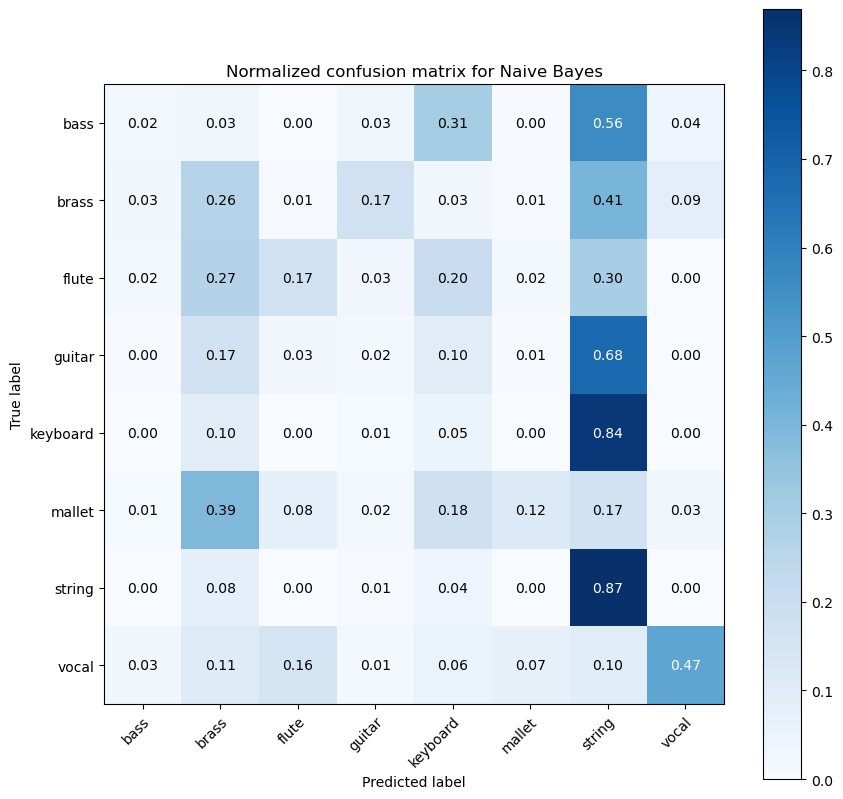

In [132]:
plot_confusion_matrix(y_test2, y_pred_NB2, classes=class_names2, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/NB_normalized2.png')

# Random Forests

In [133]:
#instantiate the random forest
clf_Rf2 =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [134]:
clf_Rf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [135]:
y_pred_RF2 = clf_Rf2.predict(X_test2)

In [136]:
accuracy_RF2 = np.mean(y_pred_RF2 == y_test2)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF2))

The accuracy of Random Forest is 63.30%


Normalized confusion matrix
[[0.70699881 0.00355872 0.         0.12099644 0.14946619 0.01660735
  0.00118624 0.00118624]
 [0.04832714 0.68401487 0.0260223  0.0260223  0.01858736 0.00371747
  0.00371747 0.18959108]
 [0.03888889 0.00555556 0.75555556 0.06111111 0.01666667 0.07222222
  0.         0.05      ]
 [0.18865031 0.00153374 0.01533742 0.5398773  0.24079755 0.01226994
  0.00153374 0.        ]
 [0.21671018 0.0156658  0.0156658  0.21671018 0.50261097 0.01436031
  0.01305483 0.00522193]
 [0.11354582 0.02390438 0.04780876 0.02589641 0.0438247  0.58366534
  0.05378486 0.10756972]
 [0.04901961 0.00326797 0.00326797 0.05228758 0.03267974 0.
  0.85947712 0.        ]
 [0.10638298 0.         0.02836879 0.10638298 0.         0.
  0.         0.75886525]]


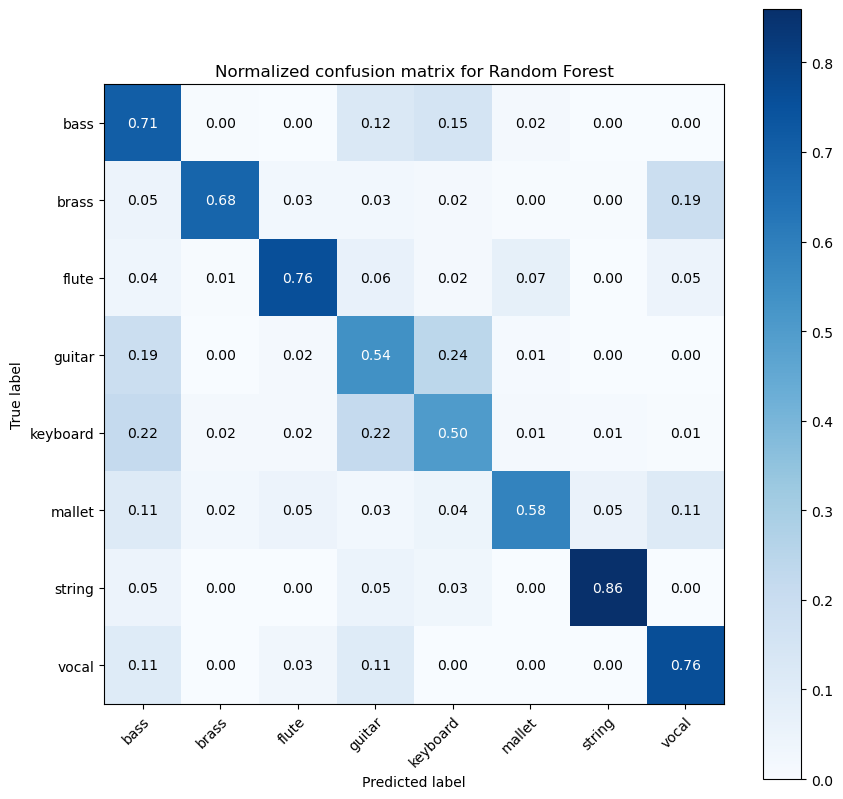

In [137]:
plot_confusion_matrix(y_test2, y_pred_RF2, classes=class_names2, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/RF_Normalized2.png')

# SVM

In [35]:
#instantiate the sclaer
scaler2 = MinMaxScaler()

In [36]:
#scale the feature space
X_train_scale2 = scaler2.fit_transform(X_train2)
X_test_scale2 = scaler2.fit_transform(X_test2)

In [37]:
#instatiate the  classifier
clf_svm2 = SVC(C=0.1)

In [38]:
clf_svm2.fit(X_train_scale2, y_train2)

SVC(C=0.1)

In [39]:
y_pred_svm2 = clf_svm.predict(X_test2)
accuracy_svm2 = np.mean(y_pred_svm2 == y_test2)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm2))

NameError: name 'clf_svm' is not defined

In [ ]:
#display non normalized confusion matrix
confusion_matrix(y_test2, y_pred_svm2)

In [ ]:
plot_confusion_matrix(y_test2, y_pred_svm2,classes=class_names2, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/SVM_Normalized2.png')